In [17]:
#We chose regression in this task. Classification is best used for predicting where the "Stock" is heading, lower or higher. Where on the other side, regression is used for predicting the specific number. 
#We need to predict the price of Tesla on a specific date, thats why regression is the best option for us. 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt



url="TSLA.csv"
df = pd.read_csv(url, sep=',')

df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
# Hentet fra Slack Channel

df = df[['Date','Close']]
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


Text(0, 0.5, 'close price')

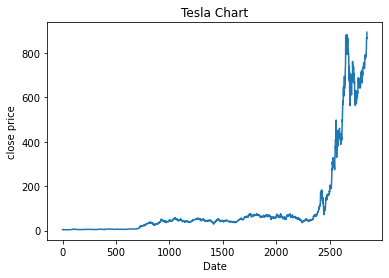

In [18]:
plt.figure()
plt.plot(df['Close'])
plt.title('Tesla Chart')
plt.xlabel('Date')
plt.ylabel('close price')